In [20]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
dt= pd.read_csv('dataset.csv')
dt

,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,...,label:STAIRS_-_GOING_DOWN,label:ELEVATOR,label:OR_standing,label:AT_SCHOOL,label:PHONE_IN_HAND,label:PHONE_IN_BAG,label:PHONE_ON_TABLE,label:WITH_CO-WORKERS,label:WITH_FRIENDS,label_source
0,1449601597,1.000371,0.007671,-0.016173,0.027860,0.998221,1.000739,1.003265,0.891038,6.684582,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
1,1449601657,1.000243,0.003782,-0.002713,0.007046,0.998463,1.000373,1.002088,1.647929,6.684605,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,1449601717,1.000811,0.002082,-0.001922,0.003575,0.999653,1.000928,1.002032,1.960286,6.684610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,1449601777,1.001245,0.004715,-0.002895,0.008881,0.999188,1.001425,1.003500,1.614524,6.684601,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,1449601855,1.001354,0.065186,-0.096520,0.165298,1.000807,1.002259,1.003631,0.837790,6.682252,...,0.0,NaN,0.0,1.0,NaN,NaN,NaN,NaN,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,1449859467,1.002591,0.001446,0.000142,0.001900,1.001562,1.002603,1.003569,2.401218,6.684611,...,0.0,NaN,0.0,1.0,NaN,NaN,NaN,NaN,1.0,2
3956,1449859527,1.002673,0.001349,-0.000593,0.001731,1.001677,1.002749,1.003635,2.593006,6.684611,...,0.0,NaN,0.0,1.0,NaN,NaN,NaN,NaN,1.0,2
3957,1449859587,1.002523,0.028048,0.027043,0.076903,1.001037,1.002792,1.004425,0.509456,6.684221,...,0.0,NaN,0.0,1.0,NaN,NaN,NaN,NaN,1.0,2
3958,1449859647,1.002590,0.005246,-0.001691,0.008700,1.000274,1.002775,1.005013,1.941774,6.684598,...,0.0,NaN,0.0,1.0,NaN,NaN,NaN,NaN,1.0,2


In [10]:
dt['location:log_longitude_range']=dt['location:log_longitude_range'].fillna(dt['location:log_longitude_range'].mean())
dt['location:log_latitude_range']=dt['location:log_latitude_range'].fillna(dt['location:log_latitude_range'].mean())

In [16]:
locations = dt[["location:log_latitude_range", "location:log_longitude_range"]]

In [17]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(locations)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


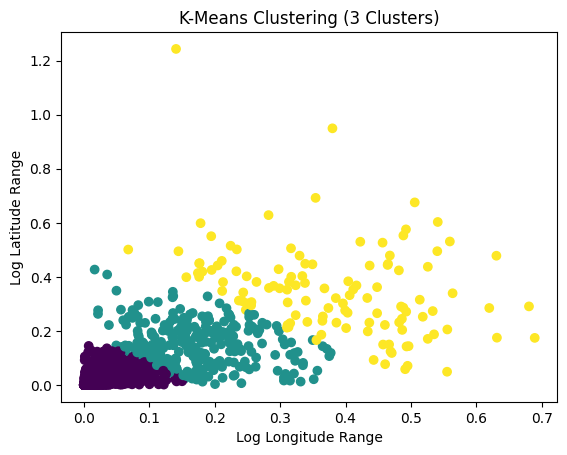

In [19]:
plt.scatter(locations["location:log_longitude_range"], locations["location:log_latitude_range"], c=labels)
plt.xlabel("Log Longitude Range")
plt.ylabel("Log Latitude Range")
plt.title("K-Means Clustering (3 Clusters)")
plt.show()

<ipython-input-23-fabd911b96a2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.dropna(inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-23-fabd911b96a2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Cluster'] = kmeans.labels_


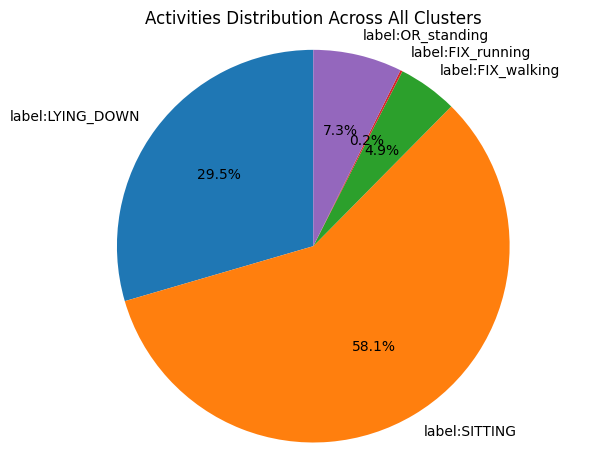

In [23]:
relevant_columns = ['location:log_latitude_range', 'location:log_longitude_range',
                    'label:LYING_DOWN', 'label:SITTING', 'label:FIX_walking',
                    'label:FIX_running', 'label:OR_standing']
filtered_data = dt[relevant_columns]
filtered_data.dropna(inplace=True)
scaler = StandardScaler()
location_data_scaled = scaler.fit_transform(filtered_data[['location:log_latitude_range', 'location:log_longitude_range']])
kmeans = KMeans(n_clusters=3)
kmeans.fit(location_data_scaled)
filtered_data['Cluster'] = kmeans.labels_
cluster_activities = filtered_data.groupby('Cluster')[['label:LYING_DOWN', 'label:SITTING', 'label:FIX_walking',
                                                       'label:FIX_running', 'label:OR_standing']].sum()
total_activities = cluster_activities.sum(axis=0)
activity_percentages = (total_activities / total_activities.sum()) * 100
labels = list(activity_percentages.index)
plt.pie(activity_percentages, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Activities Distribution Across All Clusters')
plt.tight_layout()
plt.show()